**Data Analysis and Visualization**

In this section, the results obtained in "model_run" will be analyzed and visualized.

In [4]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Upload Necessary Data**

<class 'pandas.core.frame.DataFrame'>
     Step  replication/seed  total_adapted_households  \
0       0               4.5                       9.0   
1       1               4.5                      10.8   
2       2               4.5                      12.4   
3       3               4.5                      14.0   
4       4               4.5                      15.2   
..    ...               ...                       ...   
395   395               4.5                     143.6   
396   396               4.5                     143.5   
397   397               4.5                     143.6   
398   398               4.5                     143.7   
399   399               4.5                     144.1   

     total_dryproofed_households  total_wetproofed_households  \
0                            3.2                          5.8   
1                            3.8                          7.0   
2                            4.4                          8.0   
3                

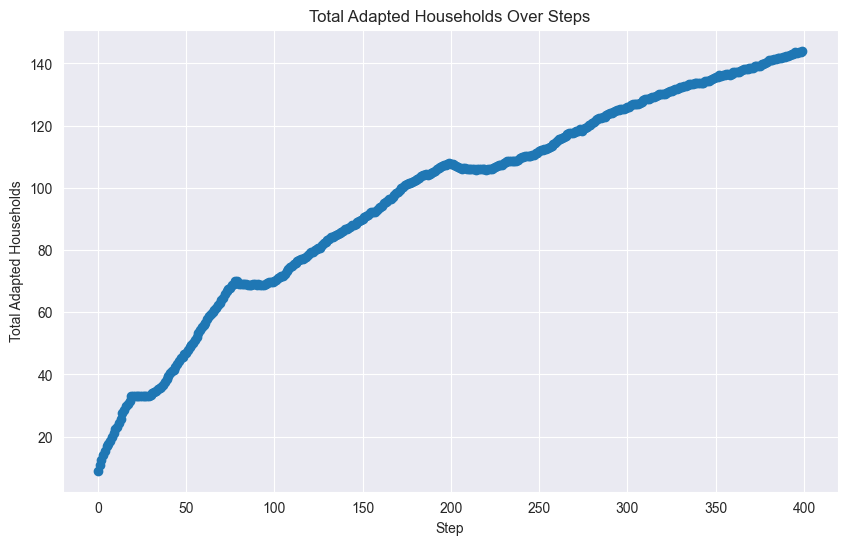

In [15]:
# upload the data with the following code
# change the file name to the file you want to load
model_dataframe_initial = pd.read_csv(f"../results/{'model_results_no_subsidy'}.csv")
#agent_dataframe_initial = pd.read_csv(f"../results/{'agent_results_no_subsidy'}.csv")
print(type(model_dataframe_initial))

model_dataframe_income_threshold = pd.read_csv(f"../results/{'model_sensitivity_results_income_threshold'}.csv")
# agent_dataframe_income_threshold = pd.read_csv(f"../results/{'agent_sensitivity_results_income_threshold'}.csv")

model_dataframe_saving_threshold = pd.read_csv(f"../results/{'model_sensitivity_results_saving_threshold'}.csv")
# agent_dataframe_saving_threshold = pd.read_csv(f"../results/{'agent_sensitivity_results_saving_threshold'}.csv")

model_dataframe_subsidy_rate = pd.read_csv(f"../results/{'model_sensitivity_results_subsidy_rate'}.csv")
# agent_dataframe_subsidy_rate = pd.read_csv(f"../results/{'agent_sensitivity_results_subsidy_rate'}.csv")

model_dataframe_flood_prob = pd.read_csv(f"../results/{'model_sensitivity_results_flood_prob'}.csv")
# agent_dataframe_flood_prob = pd.read_csv(f"../results/{'agent_sensitivity_results_flood_prob'}.csv")

# Group by the "step" column and calculate the mean of "total_adapted_households" and "replication/seed"
grouped_data = model_dataframe_initial.groupby('Step').agg('mean').reset_index()
grouped_data_1 = model_dataframe_income_threshold.groupby('Step').agg('mean').reset_index()
grouped_data_2 = model_dataframe_saving_threshold.groupby('Step').agg('mean').reset_index()
grouped_data_3 = model_dataframe_subsidy_rate.groupby('Step').agg('mean').reset_index()
grouped_data_4= model_dataframe_flood_prob.groupby('Step').agg('mean').reset_index()

# The grouped_data DataFrame now contains the average values for each unique "step" value
# print(grouped_data)


# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(grouped_data['Step'], grouped_data['total_adapted_households'], marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Total Adapted Households Over Steps')

# Show the grid
plt.grid(True)

# Display the chart
plt.show()

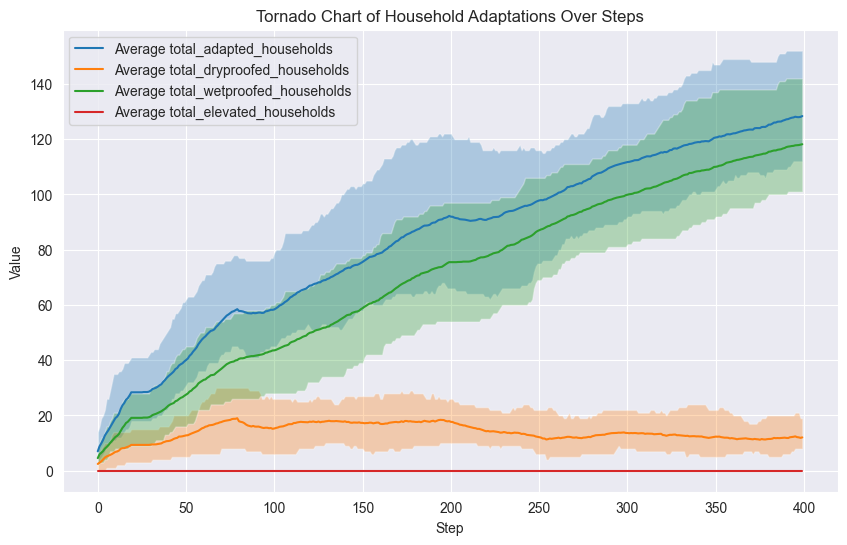

In [8]:
grouped = model_dataframe_income_threshold.groupby('Step').agg({
    'total_adapted_households': ['mean', 'min', 'max'],
    'total_dryproofed_households': ['mean', 'min', 'max'],
    'total_wetproofed_households': ['mean', 'min', 'max'],
    'total_elevated_households': ['mean', 'min', 'max']
})

# Reset index to make 'Step' a column
grouped = grouped.reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# For each feature, plot the mean line and the shadow area
for feature in ['total_adapted_households', 'total_dryproofed_households', 
                'total_wetproofed_households', 'total_elevated_households']:
    plt.plot(grouped['Step'], grouped[feature]['mean'], label=f'Average {feature}')
    plt.fill_between(grouped['Step'], grouped[feature]['min'], grouped[feature]['max'], alpha=0.3)

plt.xlabel('Step')
plt.ylabel('Value')
plt.title('Tornado Chart of Household Adaptations Over Steps')
plt.legend()
plt.show()

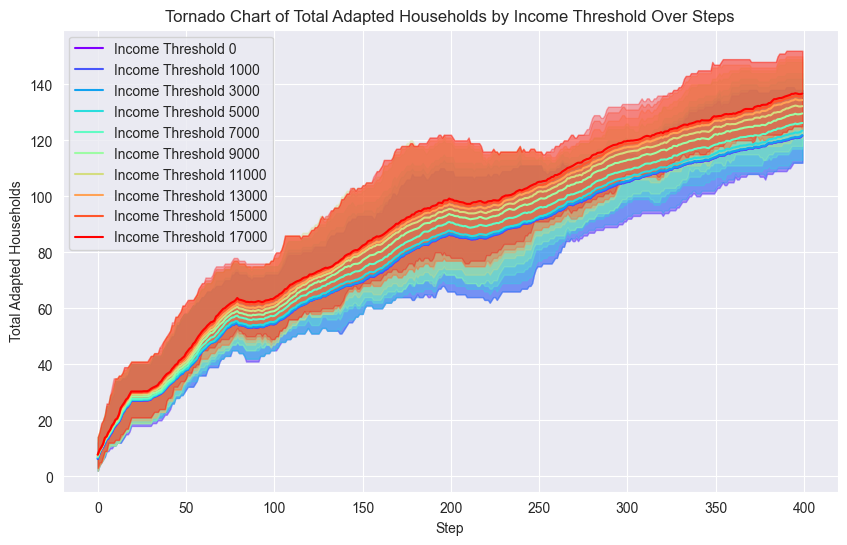

In [9]:
model_dataframe_income_threshold = pd.read_csv(f"../results/{'model_sensitivity_results_income_threshold'}.csv")
# Group by 'Step' and 'income_threshold', then calculate the mean, min, and max for 'total_adapted_households'
grouped = model_dataframe_income_threshold.groupby(['Step', 'income_threshold'])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

# Get unique income_threshold values for color differentiation
income_thresholds = grouped['income_threshold'].unique()

# Create a color map to assign different colors for each income_threshold
color_map = plt.cm.rainbow(np.linspace(0, 1, len(income_thresholds)))

plt.figure(figsize=(10, 6))

# Plot each income_threshold in different colors
for income_threshold, color in zip(income_thresholds, color_map):
    # Subset the DataFrame for the current income_threshold
    subset = grouped[grouped['income_threshold'] == income_threshold]

    # Plot the mean line for total_adapted_households
    plt.plot(subset['Step'], subset['mean'], label=f'Income Threshold {income_threshold}', color=color)

    # Create the shadow area for the same income_threshold
    plt.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Tornado Chart of Total Adapted Households by Income Threshold Over Steps')
plt.legend()
plt.show()

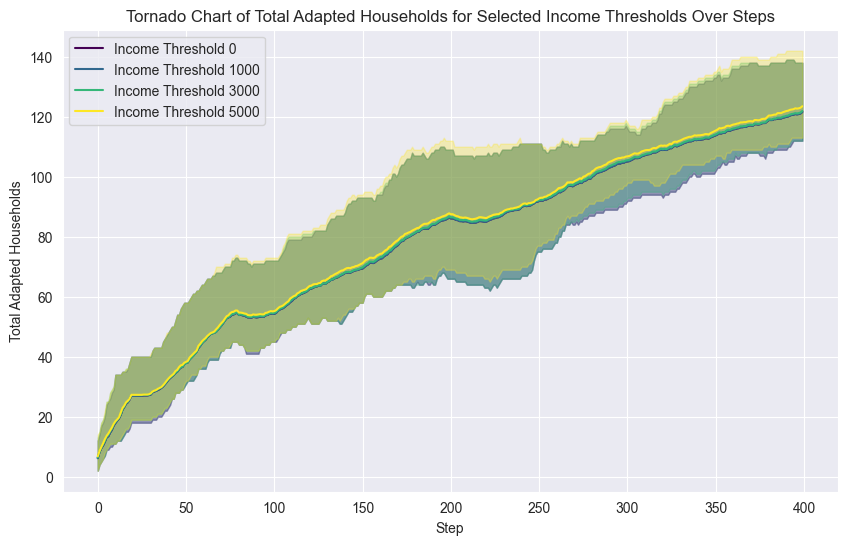

In [22]:
# Group by 'Step' and 'income_threshold', then calculate the mean, min, and max for 'total_adapted_households'
grouped = model_dataframe_income_threshold.groupby(['Step', 'income_threshold'])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

# Define the income_thresholds you are interested in
selected_income_thresholds = [0, 1000, 3000, 5000]

# Filter the grouped DataFrame to only include the selected income_thresholds
filtered_grouped = grouped[grouped['income_threshold'].isin(selected_income_thresholds)]

# Get unique income_threshold values for color differentiation (after filtering)
income_thresholds = filtered_grouped['income_threshold'].unique()

# Create a color map to assign different colors for each selected income_threshold
color_map = plt.cm.viridis(np.linspace(0, 1, len(income_thresholds)))

plt.figure(figsize=(10, 6))

# Plot each selected income_threshold in different colors
for income_threshold, color in zip(income_thresholds, color_map):
    # Subset the DataFrame for the current income_threshold
    subset = filtered_grouped[filtered_grouped['income_threshold'] == income_threshold]

    # Plot the mean line for total_adapted_households
    plt.plot(subset['Step'], subset['mean'], label=f'Income Threshold {income_threshold}', color=color)

    # Create the shadow area for the same income_threshold
    plt.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Tornado Chart of Total Adapted Households for Selected Income Thresholds Over Steps')
plt.legend()
plt.show()

KeyError: 'subsidy_rate'

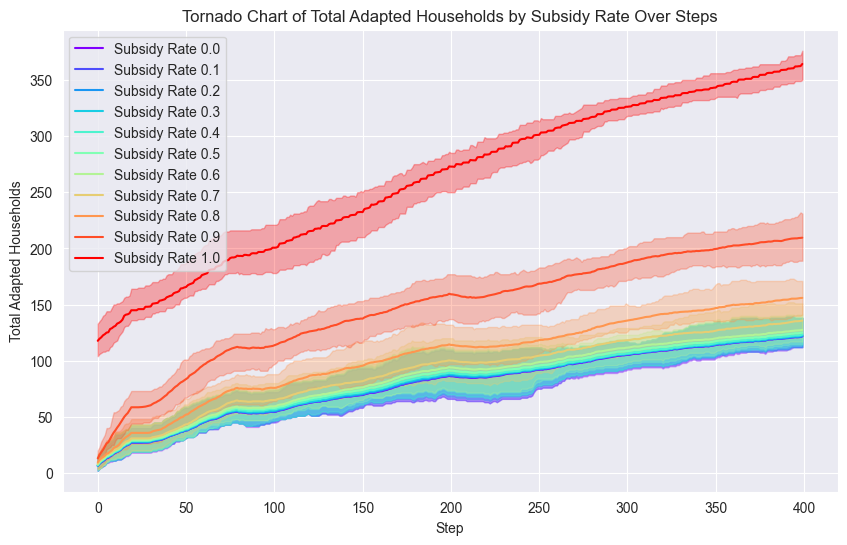

In [13]:
# Group the data by 'Step' and 'subsidy_rate' and calculate the mean, min, and max values for 'total_adapted_households'
grouped = model_dataframe_subsidy_rate.groupby(['Step', 'subsidy_rate'])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

# Get unique subsidy_rate values for color differentiation
subsidy_rates = grouped['subsidy_rate'].unique()

# Create a color map to assign different colors for each subsidy_rate
color_map = plt.cm.rainbow(np.linspace(0, 1, len(subsidy_rates)))

plt.figure(figsize=(10, 6))

# Plot each subsidy_rate in different colors
for subsidy_rate, color in zip(subsidy_rates, color_map):
    # Subset the DataFrame for the current subsidy_rate
    subset = grouped[grouped['subsidy_rate'] == subsidy_rate]

    # Plot the mean line for total_adapted_households
    plt.plot(subset['Step'], subset['mean'], label=f'Subsidy Rate {subsidy_rate}', color=color)

    # Create the shadow area for the same subsidy_rate
    plt.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Tornado Chart of Total Adapted Households by Subsidy Rate Over Steps')
plt.legend()
plt.show()

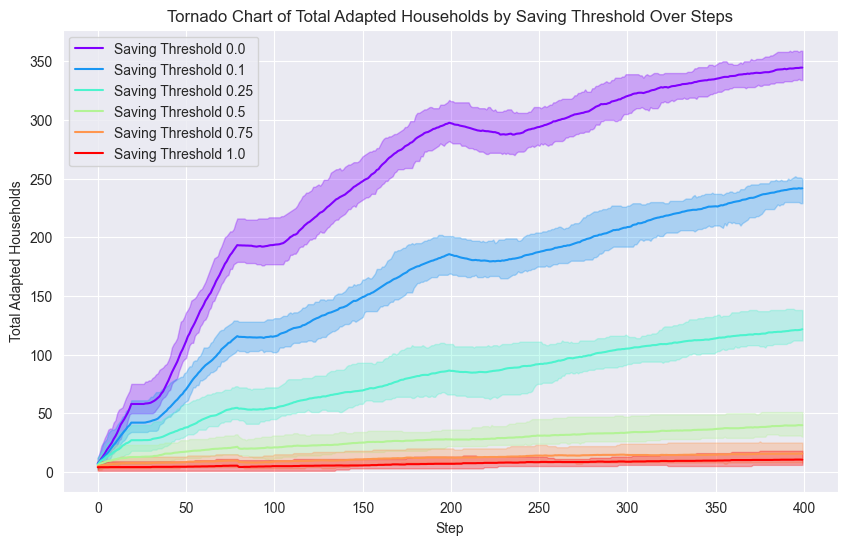

In [20]:
# Group the data by 'Step' and 'saving_threshold' and calculate the mean, min, and max values for 'total_adapted_households'
grouped = model_dataframe_saving_threshold.groupby(['Step', 'rate'])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

# Get unique saving_threshold values for color differentiation
rates = grouped['rate'].unique()

# Create a color map to assign different colors for each saving_threshold
color_map = plt.cm.rainbow(np.linspace(0, 1, len(rates)))

plt.figure(figsize=(10, 6))

# Plot each saving_threshold in different colors
for rate, color in zip(rates, color_map):
    # Subset the DataFrame for the current saving_threshold
    subset = grouped[grouped['rate'] == rate]

    # Plot the mean line for total_adapted_households
    plt.plot(subset['Step'], subset['mean'], label=f'Saving Threshold {rate}', color=color)

    # Create the shadow area for the same saving_threshold
    plt.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Tornado Chart of Total Adapted Households by Saving Threshold Over Steps')
plt.legend()
plt.show()

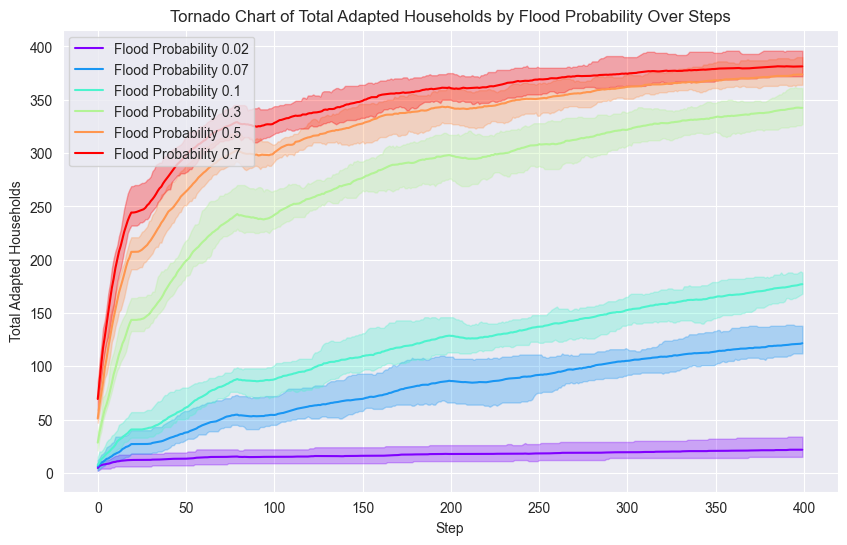

In [21]:
# Group the data by 'Step' and 'flood_probability' and calculate the mean, min, and max values for 'total_adapted_households'
grouped = model_dataframe_flood_prob.groupby(['Step', 'flood_probability'])['total_adapted_households'].agg(['mean', 'min', 'max']).reset_index()

# Get unique flood_probability values for color differentiation
flood_probabilities = grouped['flood_probability'].unique()

# Create a color map to assign different colors for each flood_probability
color_map = plt.cm.rainbow(np.linspace(0, 1, len(flood_probabilities)))

plt.figure(figsize=(10, 6))

# Plot each flood_probability in different colors
for flood_probability, color in zip(flood_probabilities, color_map):
    # Subset the DataFrame for the current flood_probability
    subset = grouped[grouped['flood_probability'] == flood_probability]

    # Plot the mean line for total_adapted_households
    plt.plot(subset['Step'], subset['mean'], label=f'Flood Probability {flood_probability}', color=color)

    # Create the shadow area for the same flood_probability
    plt.fill_between(subset['Step'], subset['min'], subset['max'], alpha=0.3, color=color)

plt.xlabel('Step')
plt.ylabel('Total Adapted Households')
plt.title('Tornado Chart of Total Adapted Households by Flood Probability Over Steps')
plt.legend(loc='upper left')
plt.show()